# Relay one model

In [56]:
import numpy as np
import os

import game
import dqn

import importlib
importlib.reload(game)
importlib.reload(dqn)

model = 128
folder = 'models'

record_video = False

env = game.Environment()

agent = dqn.DQN(
    state_shape=env.ENVIRONMENT_SHAPE,
    action_size=env.ACTION_SPACE_SIZE
)

# agent.load(f'models/{model}.h5')
agent.load(f'{folder}/{model}.h5')

state = env.reset()
state = np.expand_dims(state, axis=0)

import pygame
pygame.init()
screen = pygame.display.set_mode((env.WINDOW_WIDTH, env.WINDOW_HEIGHT))
clock = pygame.time.Clock()
running = True
score = 0

import record
recorder = None
if record_video:
    recorder = record.ScreenRecorder(env.WINDOW_WIDTH, env.WINDOW_HEIGHT, env.FPS, f"{folder}_{model}.avi")

while running:

    pygame.display.set_caption(f"Score: {score}")

    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False

    action = agent.act(state, 0)
    state, reward, done, score = env.step(action)
    state = np.expand_dims(state, axis=0)

    env.render(screen)
    pygame.display.flip()
    clock.tick(15)

    if record_video:
        recorder.capture_frame(screen)

pygame.quit()
if record_video:
    recorder.end_recording()

# Record 3 models at once

In [57]:
import numpy as np

import game
import dqn

import importlib
importlib.reload(game)
importlib.reload(dqn)

models = [-1, 50, 128]
folder = 'models'

agents = []
envs = []
states = []
scores = [0 for m in models]

for model in models:
    env = game.Environment()
    agent = dqn.DQN(
        state_shape=env.ENVIRONMENT_SHAPE,
        action_size=env.ACTION_SPACE_SIZE
    )
    agent.load(f'{folder}/{model}.h5')

    state = env.reset()
    state = np.expand_dims(state, axis=0)

    agents.append(agent)
    envs.append(env)
    states.append(state)

padding = 10

env = envs[0]

import pygame
pygame.init()
screen = pygame.display.set_mode((env.WINDOW_WIDTH * len(models) + (padding * (len(models) - 1)), env.WINDOW_HEIGHT))
pygame.display.set_caption(f"Models: {models}")
font = pygame.font.SysFont(None, 36)
clock = pygame.time.Clock()
running = True

record_video = True

import record
recorder = None
if record_video:
    recorder = record.ScreenRecorder(env.WINDOW_WIDTH * len(models) + (padding * (len(models) - 1)), env.WINDOW_HEIGHT, 15, f"{folder}_comparison.avi")

MAX_TICKS = 2000

tick = 0
while running:

    screen.fill("white")

    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False

    for m, model in enumerate(models):

        x_offset = m * (env.WINDOW_WIDTH + padding)

        action = agents[m].act(states[m], 0)
        state, reward, done, scores[m] = envs[m].step(action)
        states[m] = np.expand_dims(state, axis=0)

        envs[m].render(screen, solo=False, x_offset=x_offset)

        text_surface = font.render(f"{scores[m]}", True, (50, 50, 50))
        screen.blit(text_surface, (int(x_offset + env.WINDOW_WIDTH / 2) - 10, 20))

    # black bars
    for i in range(1, len(models)):
        x_offset = i * (env.WINDOW_WIDTH + padding)
        pygame.draw.rect(
            screen,
            "black",
            ((x_offset + padding, 0), (padding, env.WINDOW_HEIGHT))
        )
    
    pygame.display.flip()
    clock.tick(30)

    if record_video:
        recorder.capture_frame(screen)

    tick += 1

    if tick >= MAX_TICKS:
        running = False

pygame.quit()
if record_video:
    recorder.end_recording()

Initializing ScreenRecorder with parameters width:1100 height:360 fps:15.
Output of the screen recording saved to models_comparison.avi.


In [54]:
print(envs[0].field.body)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 2. 2. 0. 0. 0. 0. 0. 0.]]


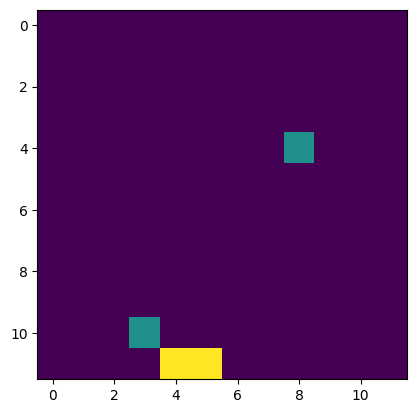

In [55]:
import matplotlib.pyplot as plt

plt.imshow(envs[0].field.body)